In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow
from tensorflow import keras
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint
from PIL import Image
import shutil

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
dataset_156 = "/kaggle/input/mri156"
dataset_67 = "//kaggle/input/mri067/Brain_Tumor_Detection/no"

In [4]:
file_path_dataset_156 = []
file_class_dataset_156 = []

dataset_156_dirs = os.listdir(dataset_156)

for dir in dataset_156_dirs:
    path = os.path.join(dataset_156, dir)
    sub_path = os.listdir(path)
    for item in sub_path:
        item_path = os.path.join(path, item)
        file_path = os.listdir(item_path)
        for file in file_path:
            file_path_dataset_156.append(os.path.join(item_path, file))
            part_156 = file.split('-')[1]
            part_156 = part_156.split('_')[0]
            part_156 = part_156.split('T')[0]
            if part_156 == "gl":
                file_class_dataset_156.append("glioma")
            elif part_156 == "me":
                file_class_dataset_156.append("meningioma")
            elif part_156 == "no":
                file_class_dataset_156.append("notumor")
            elif part_156 == "pi":
                file_class_dataset_156.append("pituitary")
            else: 
                file_class_dataset_156.append("UNKNOWN")

class_156_df = pd.DataFrame(file_class_dataset_156, columns=['Class'])
path_156_df = pd.DataFrame(file_path_dataset_156, columns=['Path'])

dataset_156_df = pd.concat([class_156_df, path_156_df], axis=1)
print(dataset_156_df.Class.value_counts())
pd.set_option('display.max_colwidth', None)
dataset_156_df

Class
notumor       2000
pituitary     1757
meningioma    1645
glioma        1621
Name: count, dtype: int64


,Class,Path
0,pituitary,/kaggle/input/mri156/Training/pituitary/Tr-pi_0532.jpg
1,pituitary,/kaggle/input/mri156/Training/pituitary/Tr-pi_0282.jpg
2,pituitary,/kaggle/input/mri156/Training/pituitary/Tr-pi_1401.jpg
3,pituitary,/kaggle/input/mri156/Training/pituitary/Tr-pi_0914.jpg
4,pituitary,/kaggle/input/mri156/Training/pituitary/Tr-pi_0691.jpg
...,...,...
7018,glioma,/kaggle/input/mri156/Testing/glioma/Te-gl_0107.jpg
7019,glioma,/kaggle/input/mri156/Testing/glioma/Te-gl_0288.jpg
7020,glioma,/kaggle/input/mri156/Testing/glioma/Te-gl_0108.jpg
7021,glioma,/kaggle/input/mri156/Testing/glioma/Te-glTr_0004.jpg


In [5]:
file_path_dataset_67 = []
file_class_dataset_67 = []

dataset_67_dirs = os.listdir(dataset_67)

for file in dataset_67_dirs:
    file_path_dataset_67.append(os.path.join(dataset_67, file))
    part_67 = file.split("o")[0]
    if part_67 == "n":
        file_class_dataset_67.append("notumor")
    else:
        file_class_dataset_67.append("notumor")

class_67_df = pd.DataFrame(file_class_dataset_67, columns=['Class'])
path_67_df = pd.DataFrame(file_path_dataset_67, columns=['Path'])
dataset_67_df = pd.concat([class_67_df, path_67_df], axis=1)
print(dataset_67_df.Class.value_counts())
pd.set_option('display.max_colwidth', None)
dataset_67_df

Class
notumor    1500
Name: count, dtype: int64


,Class,Path
0,notumor,//kaggle/input/mri067/Brain_Tumor_Detection/no/no26.jpg
1,notumor,//kaggle/input/mri067/Brain_Tumor_Detection/no/no979.jpg
2,notumor,//kaggle/input/mri067/Brain_Tumor_Detection/no/no598.jpg
3,notumor,//kaggle/input/mri067/Brain_Tumor_Detection/no/no141.jpg
4,notumor,//kaggle/input/mri067/Brain_Tumor_Detection/no/no715.jpg
...,...,...
1495,notumor,//kaggle/input/mri067/Brain_Tumor_Detection/no/no941.jpg
1496,notumor,//kaggle/input/mri067/Brain_Tumor_Detection/no/no853.jpg
1497,notumor,//kaggle/input/mri067/Brain_Tumor_Detection/no/no884.jpg
1498,notumor,//kaggle/input/mri067/Brain_Tumor_Detection/no/no1370.jpg


In [6]:
data_path = pd.concat([dataset_156_df, dataset_67_df], axis = 0)
print(data_path.Class.value_counts())
data_path

Class
notumor       3500
pituitary     1757
meningioma    1645
glioma        1621
Name: count, dtype: int64


,Class,Path
0,pituitary,/kaggle/input/mri156/Training/pituitary/Tr-pi_0532.jpg
1,pituitary,/kaggle/input/mri156/Training/pituitary/Tr-pi_0282.jpg
2,pituitary,/kaggle/input/mri156/Training/pituitary/Tr-pi_1401.jpg
3,pituitary,/kaggle/input/mri156/Training/pituitary/Tr-pi_0914.jpg
4,pituitary,/kaggle/input/mri156/Training/pituitary/Tr-pi_0691.jpg
...,...,...
1495,notumor,//kaggle/input/mri067/Brain_Tumor_Detection/no/no941.jpg
1496,notumor,//kaggle/input/mri067/Brain_Tumor_Detection/no/no853.jpg
1497,notumor,//kaggle/input/mri067/Brain_Tumor_Detection/no/no884.jpg
1498,notumor,//kaggle/input/mri067/Brain_Tumor_Detection/no/no1370.jpg


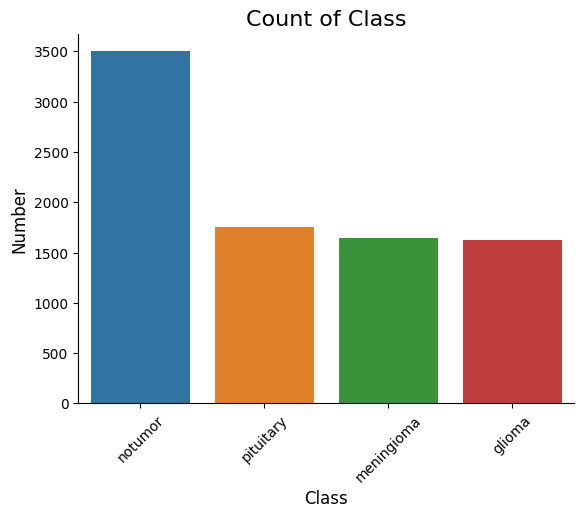

In [7]:
plt.title('Count of Class', size=16)
sns.barplot(x=data_path['Class'].value_counts().index, y=data_path['Class'].value_counts())
plt.ylabel('Number', size=12)
plt.xlabel('Class', size=12)
plt.xticks(rotation=45)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [8]:
dataset_aug = "/kaggle/input/augment-images"

file_path_dataset_aug = []
file_class_dataset_aug = []

dataset_aug_dirs = os.listdir(dataset_aug)

for class_name in dataset_aug_dirs:
    class_path = os.path.join(dataset_aug, class_name)
    if os.path.isdir(class_path):
        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)
            file_path_dataset_aug.append(file_path)
            file_class_dataset_aug.append(class_name)

class_aug_df = pd.DataFrame(file_class_dataset_aug, columns=['Class'])
path_aug_df = pd.DataFrame(file_path_dataset_aug, columns=['Path'])
dataset_aug_df = pd.concat([class_aug_df, path_aug_df], axis=1)
print(dataset_aug_df.Class.value_counts())
pd.set_option('display.max_colwidth', None)
dataset_aug_df

Class
pituitary     1605
meningioma    1506
glioma        1498
Name: count, dtype: int64


,Class,Path
0,pituitary,/kaggle/input/augment-images/pituitary/_0_4157.jpg
1,pituitary,/kaggle/input/augment-images/pituitary/_0_6872.jpg
2,pituitary,/kaggle/input/augment-images/pituitary/_0_6076.jpg
3,pituitary,/kaggle/input/augment-images/pituitary/_0_8431.jpg
4,pituitary,/kaggle/input/augment-images/pituitary/_0_8056.jpg
...,...,...
4604,glioma,/kaggle/input/augment-images/glioma/_0_6323.jpg
4605,glioma,/kaggle/input/augment-images/glioma/_0_984.jpg
4606,glioma,/kaggle/input/augment-images/glioma/_0_7596.jpg
4607,glioma,/kaggle/input/augment-images/glioma/_0_3514.jpg


In [9]:
df_path = pd.concat([data_path, dataset_aug_df], axis = 0)
print(df_path.Class.value_counts())
df_path

Class
notumor       3500
pituitary     3362
meningioma    3151
glioma        3119
Name: count, dtype: int64


,Class,Path
0,pituitary,/kaggle/input/mri156/Training/pituitary/Tr-pi_0532.jpg
1,pituitary,/kaggle/input/mri156/Training/pituitary/Tr-pi_0282.jpg
2,pituitary,/kaggle/input/mri156/Training/pituitary/Tr-pi_1401.jpg
3,pituitary,/kaggle/input/mri156/Training/pituitary/Tr-pi_0914.jpg
4,pituitary,/kaggle/input/mri156/Training/pituitary/Tr-pi_0691.jpg
...,...,...
4604,glioma,/kaggle/input/augment-images/glioma/_0_6323.jpg
4605,glioma,/kaggle/input/augment-images/glioma/_0_984.jpg
4606,glioma,/kaggle/input/augment-images/glioma/_0_7596.jpg
4607,glioma,/kaggle/input/augment-images/glioma/_0_3514.jpg


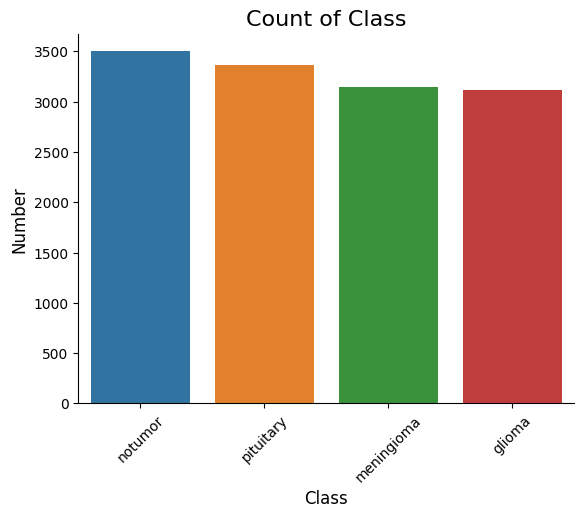

In [10]:
plt.title('Count of Class', size=16)
sns.barplot(x=df_path['Class'].value_counts().index, y=df_path['Class'].value_counts())
plt.ylabel('Number', size=12)
plt.xlabel('Class', size=12)
plt.xticks(rotation=45)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [11]:
X_train, X_temp, y_train, y_temp = train_test_split(df_path['Path'], df_path['Class'], test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)
train_df = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
test_df = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis=1)
val_df = pd.concat([pd.DataFrame(X_val), pd.DataFrame(y_val)], axis=1)
print(train_df.Class.value_counts(),"\n")
print(test_df.Class.value_counts(),"\n")
print(val_df.Class.value_counts(),"\n")

Class
notumor       2421
pituitary     2329
glioma        2232
meningioma    2210
Name: count, dtype: int64 

Class
notumor       710
pituitary     687
meningioma    645
glioma        597
Name: count, dtype: int64 

Class
notumor       369
pituitary     346
meningioma    296
glioma        290
Name: count, dtype: int64 



In [12]:
datagen_majority = ImageDataGenerator(rescale=1./255)

train_generator = datagen_majority.flow_from_dataframe(
    dataframe=train_df,
    x_col='Path',
    y_col='Class',
    target_size=(256,256),
    batch_size=(32),
    class_mode='categorical',
    shuffle=False
)

validation_generator = datagen_majority.flow_from_dataframe(
    dataframe=val_df,
    x_col='Path',
    y_col='Class',
    target_size=(256,256),
    batch_size=(32),
    class_mode='categorical',
    shuffle=False
)

Found 9192 validated image filenames belonging to 4 classes.
Found 1301 validated image filenames belonging to 4 classes.


In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(256, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(5, 5), strides=(3, 3), padding='same'))

model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
model.add(Dropout(0.15))

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 256)     19456     
                                                                 
 batch_normalization (Batch  (None, 256, 256, 256)     1024      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 86, 86, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 86, 86, 128)       295040    
                                                                 
 batch_normalization_1 (Bat  (None, 86, 86, 128)       512       
 chNormalization)                                                
                                                        

In [16]:
from keras.callbacks import ModelCheckpoint
best_model_filepath = "best_model.h5"

In [19]:
model_checkpoint = ModelCheckpoint(
    filepath=best_model_filepath,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

In [20]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [22]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[learning_rate_reduction, model_checkpoint]
)

Epoch 1/100


2024-01-05 19:31:17.876795: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


288/288 [==============================] - ETA: 0s - loss: 1.0599 - accuracy: 0.7631
Epoch 1: val_accuracy improved from -inf to 0.43582, saving model to best_model.h5
288/288 [==============================] - 167s 534ms/step - loss: 1.0599 - accuracy: 0.7631 - val_loss: 2.0016 - val_accuracy: 0.4358 - lr: 0.0010
Epoch 2/100


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


288/288 [==============================] - ETA: 0s - loss: 0.5998 - accuracy: 0.8494
Epoch 2: val_accuracy improved from 0.43582 to 0.59646, saving model to best_model.h5
288/288 [==============================] - 144s 501ms/step - loss: 0.5998 - accuracy: 0.8494 - val_loss: 1.1349 - val_accuracy: 0.5965 - lr: 0.0010
Epoch 3/100
288/288 [==============================] - ETA: 0s - loss: 0.4241 - accuracy: 0.8835
Epoch 3: val_accuracy improved from 0.59646 to 0.72022, saving model to best_model.h5
288/288 [==============================] - 144s 500ms/step - loss: 0.4241 - accuracy: 0.8835 - val_loss: 0.7838 - val_accuracy: 0.7202 - lr: 0.0010
Epoch 4/100
288/288 [==============================] - ETA: 0s - loss: 0.3530 - accuracy: 0.9017
Epoch 4: val_accuracy improved from 0.72022 to 0.75173, saving model to best_model.h5
288/288 [==============================] - 144s 501ms/step - loss: 0.3530 - accuracy: 0.9017 - val_loss: 0.7671 - val_accuracy: 0.7517 - lr: 0.0010
Epoch 5/100
288/288

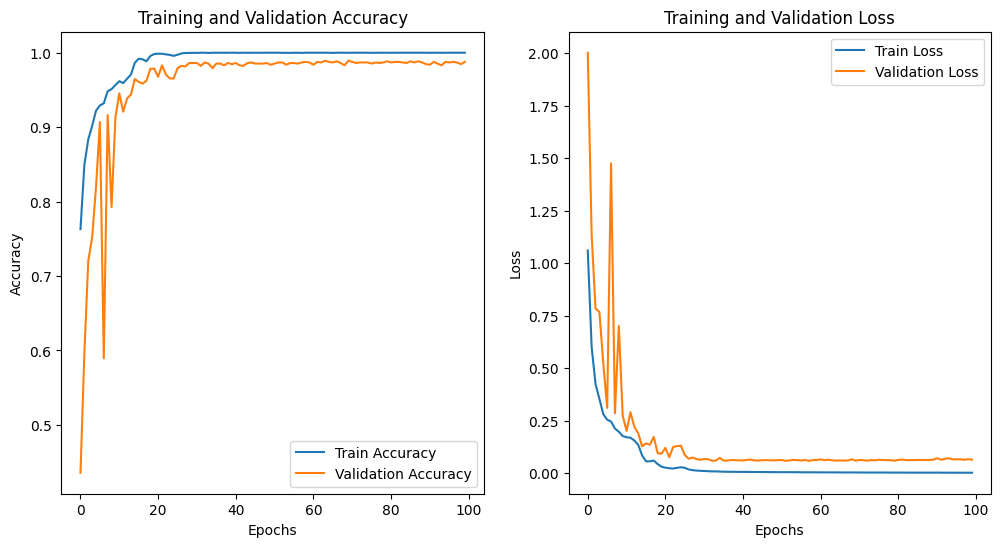

In [23]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Found 2639 validated image filenames belonging to 4 classes.
83/83 [==============================] - 8s 96ms/step
Test Accuracy: 0.9859795377036756
              precision    recall  f1-score   support

      glioma       0.98      0.98      0.98       597
  meningioma       0.98      0.98      0.98       645
     notumor       1.00      0.99      1.00       710
   pituitary       0.99      0.99      0.99       687

    accuracy                           0.99      2639
   macro avg       0.99      0.99      0.99      2639
weighted avg       0.99      0.99      0.99      2639

Confusion Matrix:
[[585  11   0   1]
 [  9 630   2   4]
 [  3   0 705   2]
 [  0   5   0 682]]


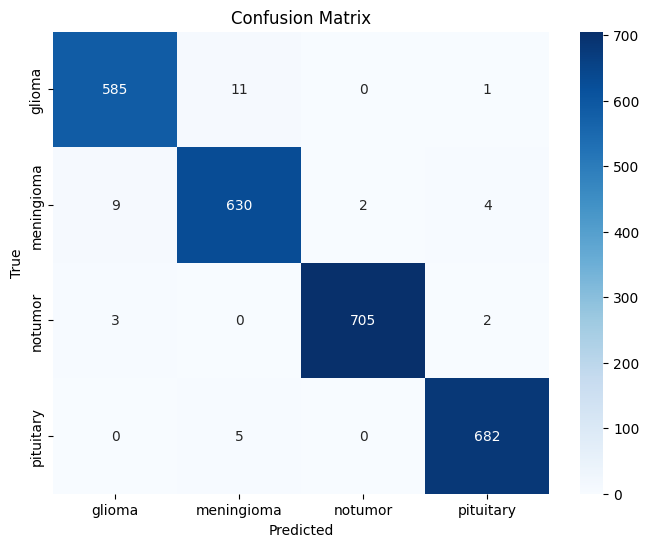

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

datagen_majority = ImageDataGenerator(rescale=1./255)

test_generator = datagen_majority.flow_from_dataframe(
    dataframe=test_df,
    x_col='Path',
    y_col='Class',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
) 

predictions = model.predict(test_generator)

predicted_classes = np.argmax(predictions, axis=1)

class_names = list(test_generator.class_indices.keys())
predicted_class_names = [class_names[i] for i in predicted_classes]

test_accuracy = accuracy_score(test_generator.classes, predicted_classes)

print(f'Test Accuracy: {test_accuracy}')

print(classification_report(test_generator.classes, predicted_classes, target_names=class_names))

conf_mat = confusion_matrix(test_generator.classes, predicted_classes)

print("Confusion Matrix:")
print(conf_mat)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

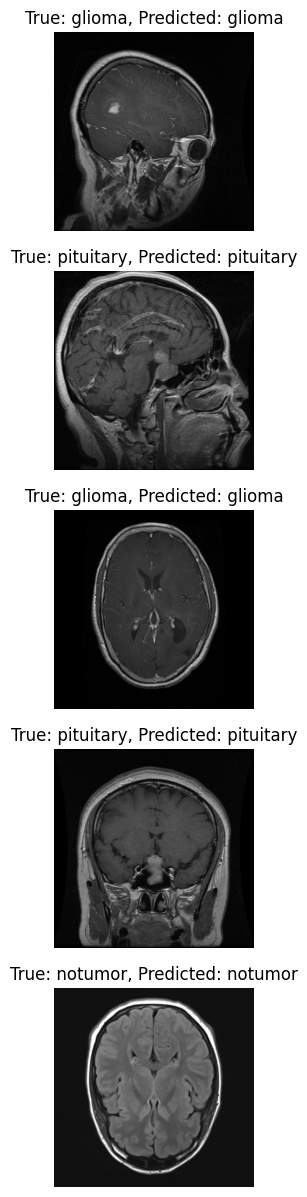

In [26]:
import matplotlib.pyplot as plt
import random

def display_images_with_labels(images, true_labels, predicted_labels, class_names, num_images=5):
    plt.figure(figsize=(15, 3 * num_images))

    for i in range(num_images):
        index = random.randint(0, len(images) - 1)
        img = plt.imread(images[index])

        plt.subplot(num_images, 1, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'True: {class_names[true_labels[index]]}, Predicted: {class_names[predicted_labels[index]]}')
        plt.axis('off')

display_images_with_labels(test_generator.filepaths, test_generator.classes, predicted_classes, class_names)
plt.show()